In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv'
data = pd.read_csv(url)
# display(data)

In [4]:
print(data.head())
print()
print(data.info())
print()
print(data.describe())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None

         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.0000

In [5]:
# print(data.columns)
print(data['user_id'].isna().mean())
print(data['age'].isna().mean())
print(data['country'].isna().mean())
print(data['purchases'].isna().mean())
print(data['revenue'].isna().mean())


0.0
0.04878048780487805
0.0
0.0
0.0


In [6]:
print(data.duplicated().mean())

0.024390243902439025


In [7]:
print('Подозрительные случаи:')
print(data[data['user_id'] <= 0])
print()
print(data[data['age'] <= 0])
print()
print(data[data['purchases'] < 0])
print()
print(data[data['revenue'] < 0])
print()

print(data[((data['age'] < 18) | (data['age'] > 100))])
print()

print(data[(((data['purchases'] == 0) & (data['revenue'] != 0)) | ((data['purchases'] != 0) & (data['revenue'] == 0)))])

print()
print('Проверка на разных пользователей с одним id')
duplicated_ids_df = data[data['user_id'].duplicated(keep=False)]
inconsistent_rows = duplicated_ids_df.drop_duplicates(keep=False)
print(inconsistent_rows)

Подозрительные случаи:
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []

Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []

    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
20       21    5.0      RU          8     1488

    user_id   age country  purchases  revenue
10       11  24.0      US          4        0

Проверка на разных пользователей с одним id
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []


Была проведена проверка на долю пропусков и полностью дублирующиеся строки, на подозрительные случаи:
нулевой или отрицательный user_id,
нулевой или отрицательный age,
отрицательный purchases,
отрицательный revenue,
age < 18 или age > 100,
ненулевой purchases при нулевом revenue,
ненулевой revenue при нулевом purchases,
одинаковый user_id, но разные данные в других столбцах.

Обнаружено:
пустое поле age в 5% случаях,
2% строк - дубликаты,
случай с purchases = -1 и age = 120,
случай с age = 5,
случай с purchases = 4 и revenue = 0.

In [8]:
print(data['country'].value_counts())

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


In [9]:
countries = data.groupby('country')
countries = countries.agg(user_count = ('country', 'count'),purchases_sum=('purchases', 'sum'), revenue_mean=('revenue', 'mean')).reset_index()
countries

,country,user_count,purchases_sum,revenue_mean
0,CN,2,9,1054.000000
1,DE,6,39,1445.500000
2,FR,12,51,675.916667
3,RU,13,62,790.076923
4,US,8,37,557.375000


Больше всего встречаются пользователи с country = FR или RU, меньше всего пользователей с country = CN.
При схожем количестве purchases_sum у стран DE и US, revenue_mean у DE почти в 3 раза больше, чем у US. При этом у DE revenue_mean наибольший, а у US - наименьший.

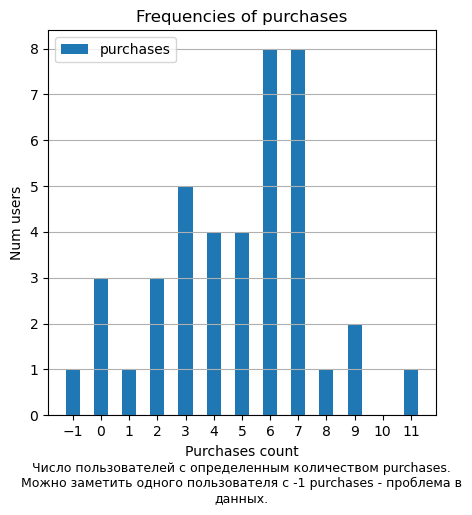

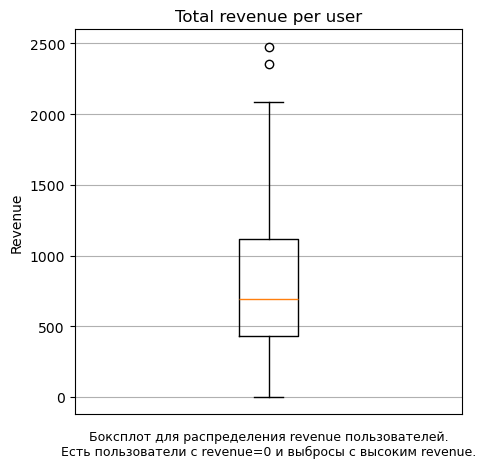

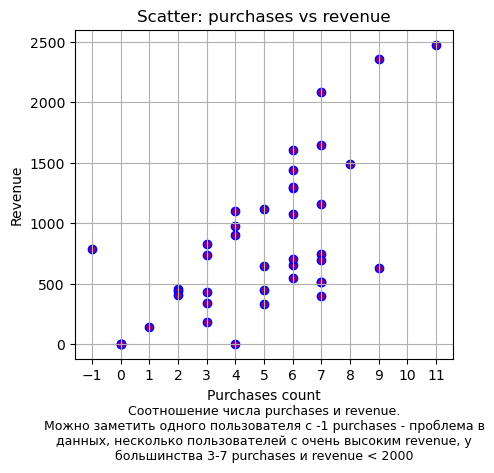

In [12]:
purchases = data['purchases']
revenue = data['revenue']
purchases_revenue = np.column_stack((purchases, revenue))
#print(purchases)
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax1.hist(purchases, bins=np.arange(purchases.min()-0.5, purchases.max()+1+0.5, 1), label=('purchases'), rwidth=0.5)
ax1.set_xlabel('Purchases count')
ax1.set_ylabel('Num users')
ax1.legend(loc='upper left')
ax1.set_title('Frequencies of purchases')
ax1.set_xticks(np.arange(purchases.min(), purchases.max()+1, 1))
ax1.grid(axis='y')
ax1.text(0.5, -0.22, 'Число пользователей с определенным количеством purchases.\n'
'Можно заметить одного пользователя с -1 purchases - проблема в данных.', transform=ax1.transAxes, ha='center', fontsize=9, wrap=True)

ax2.boxplot(revenue, showfliers=True, label=('revenue'))
ax2.set_title('Total revenue per user')
ax2.set_ylabel('Revenue')
ax2.grid(axis='y')
ax2.set_xticks([])
ax2.text(0.5, -0.1, 'Боксплот для распределения revenue пользователей.\n'
'Есть пользователи с revenue=0 и выбросы с высоким revenue.', transform=ax2.transAxes, ha='center', fontsize=9, wrap=True)

ax3.scatter(x=purchases, y=revenue, marker='o', c='purple', edgecolor='b')
ax3.set_title('Scatter: purchases vs revenue')
ax3.set_ylabel('Revenue')
ax3.set_xlabel('Purchases count')
ax3.set_xticks(np.arange(purchases.min(), purchases.max()+1, 1))
ax3.set_yticks(np.arange(revenue.min(), revenue.max()+500, 500))
ax3.grid(True)
ax3.text(0.5, -0.3, 'Соотношение числа purchases и revenue.\n'
'Можно заметить одного пользователя с -1 purchases - проблема в данных, несколько пользователей с очень высоким revenue, у большинства 3-7 purchases и revenue < 2000', transform=ax3.transAxes, ha='center', fontsize=9, wrap=True)

plt.tight_layout()
plt.show()

fig1.savefig('figures/hist.png', bbox_inches='tight')
fig2.savefig('figures/boxplot.png', bbox_inches='tight')
fig3.savefig('figures/scatterplot.png', bbox_inches='tight')


